### La Librería random

Generador de números aleatorias

Este módulo implementa generadores de números pseudo-aleatorios
para distintas distribucines. 

Para enteros, podemos hacer
una selección uniforme dentro de un rango; para secuencias, una
selección uniforme de un elemento. Podemos reordenar al azar -barajar- 
una secuencia y obtener muestras al azar.

También podemos trabajar con distintas distribucions: En este tema
veremos distribuciones uniformes, normales (Gauss) y de pareto, pero el
módulo incluye también las distribuciones logarítmica normal, exponencial
negativa, y distribuciones gamma y beta.

### La funcion `random`

Casi todas las funciones dependen de la función básica ``random()``, que
genera un numero al azar en el intervalo semiabierto [0.0, 1.0).

In [5]:
import random

for _ in range(3):
    print(random.random())

0.8345203822171855
0.11779763673887567
0.5589776920663782


Normalmente no usaremos directamente esta función -aunque podemos- porque
hay otras funciones auxiliares, que eventualmente acabarán llamando a
esta, pero a nosotros nos resultan más convenientes.

### la funcion `seed`

- `random.seed([x])`

Inicializa el generador de números con un determinado valor.
Si se omite, se usa un valor obtenido a partir de la fecha y
hora actual, pero si se especifica una semilla, la secuencia
de numeros generada a partir de ahi siempre sera la misma, lo que nos
permite producir secuencias predecibles.

In [6]:
import random

random.seed(1024920)
print(random.random(), random.random(), random.random())

random.seed(1024920)
print(random.random(), random.random(), random.random())


0.5496842526267491 0.7956055672331934 0.6592334632256923
0.5496842526267491 0.7956055672331934 0.6592334632256923


### La función choice

- `random.choice(seq)`

Dada una sequencia de elementos que se la pasa como parámetro, devuelve una de ellas
al azar. Si `seq` está vacio, eleva una excepción.



In [11]:
random.seed()
for _ in range(3):
    print(random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

F
Q
T


**Ejercicio**: Escribir una función para jugar con al Piedra, papel, tijera, que muestre uno
    de estos elementos al azar cada vez que se le llama.

In [19]:
def juego():
    item = ['piedra','papel','tijera']
    print(random.choice(item))
    
juego()

piedra


### La función choices

- `random.choices(population, weights=None, *, cum_weights=None, k=1)`

Devuelve una lista de `k` elementos, seleccionados al azar de los que le pasemos
en la variable `population`. Esta seleccion se realiza con reemplazo, asi que podemos
en principio obtener el mismo valor varias veces.

Si se especifica los pesos con el parámetro `weights`, la seleccion se realizará
teniendo en cuenta dichos pesos. Es decir, que `random.choices('ABC', weights=[4, 2, 1], k=2)`
nos devolveria dos letras del conjunto [`A`, `B`, `C`], pero la `A` aparecera con una
frecuencia doble que la de `B`, y la `B` a su vez aparecerá con una frecuencia doble que la
de `C` (Y, por tanto, la frecuencia de `A` sera 4 veces la de `C`, o lo que es lo mismo, aparecera una `C` aproximandamente cada 4 `A`.

In [37]:
for _ in range(10):
    l1, l2 = random.choices('ABC', cum_weights=[4, 6, 7], k=2)
    print(l1, l2)


A A
A A
A A
A A
A A
B A
B A
B A
C A
C B


**Ejercicio**: Cambia el parametro `weights` y vuelve a ejecutar el código
para ver el efecto en el resultado. Usa `None` (El valor por defecto)
para indicar que no quieres usar pesos.

Si usamos el parametro `cum_weights`, se entiende que son pesos acumulados. En nuestro
ejemplo anterior, los pesos 4, 2, 1 son equivalentes a usar los pesos acumulados 4, 6, 7:

$$  6 = 4 + 2 $$
$$  7 = 4 + 2 + 1 $$

Internamente, siempre se usan los valores acumulados, es decir, que si
usamod `weight`, la función calculará por su cuenta los valores
acumulados. Por tanto, de ser posible, es mejor pasar pesos acumulados si los 
hemos calculado previamente o si los podemos conseguir
ya en esa forma, ya que nos evitamos hacer el trabajo dos veces.

Si no se indica ningún tipo de pesos, se usara la misma probabilidad para
todos los elementos.

### La función sample

- `random.sample(population, k)`

Devuelve una lista de `k` elementos, elegidos al azar dentro de los elementos
contenidos en `population` (normalmente una lista o un conjunto), pero no se
realiza reemplazo, asi que no se repiten elementos (a no ser que el elemento
en si esté duplicado en `population`.

Si se usa un tamaño de la muestra, `K`, mayor que el numero de elementos en
la población, se producirá un error.

**Ejercicio**: Hacer una funcion que acepte una lista de 5 cartas y devuelva
tres, al azar. Como estamos simulando un juego de cartas, no hay reemplazo.
Las cartas se simulan con cadenas de texto, el primer caracter representa el
palo: (`D` para diamantes, `P` para picas, `T` para tréboles y `C` para corazones), el resto
representa al valor (`A`, `2`, `3`,...`10`, `J`, `Q`, `K`).

Es decir, la cadena `'TA'` sería el As de tréboles, `'C5'` el Cinco de
corazones, `'DQ'` la Reina de diamantes.

In [40]:
import random


def elige_tres(cartas):
    return random.sample(cartas, k=3)


mano = ['TA', 'C5', 'DQ', 'P10', 'D3']    
print(elige_tres(mano))

['TA', 'P10', 'D3']


### La función randrange

- `random.randrange(start, stop[, step])`

Devuelve un valor seleccionado dentro del rango definido por los parámetros
`start`, `stop` y `step`. Como su inspiración es la función `range` normal, el último
valor, definido por `stop`, esta fuera del conjunto de valores posibles.

Es equivalente a hacer `choice(range(start, stop, step))`, pero mucho más eficiente
porque no genera realmente todos los valores del rango.

**Ejercicio**: Usar `randrange` para devolver un numero entre -20 y 20, ambos extremos incluido.

In [67]:
random.randrange(-20, 21)

13

In [ ]:
# %load usar-randrange.py
import random

print(random.randrange(-20, 21))


### La funcion randint

- `random.randint(a, b)`

Si preferimos indicar el rango _incluyendo_ el valor final, podemos usar `randit`. `randint(a, b)`
es equivalente a `randrange(a, b+1)`.

Usando randit, el ejmplo anterior seria `randint(-20, 20)`

### La función shuffle

- `random.shuffle(x[, random])`

Baraja la secuencia (internamente, es decir, no genera una
nueva secuencia).

Nota: El argumento opcional `random` es una
función sin argumentos que devuelve un número en coma flotante
en el intervalo `[0.0, 1.0)` y por defecto se usará `random()`.

**Ejercicio**: Dada la secuencia de cartas que podemos encontrar en la variable `baraja`, desordenarla y mostrar
las 5 primeras

In [12]:
baraja = [
    'CA', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'CJ', 'CQ', 'CK',
    'RA', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'RJ', 'RQ', 'RK',
    'TA', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'TJ', 'TQ', 'TK',
    'PA', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'PJ', 'PQ', 'PK'
]

In [80]:
# %load baraja.py
import random

baraja = [
    'CA', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'CJ', 'CQ', 'CK',
    'RA', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'RJ', 'RQ', 'RK',
    'TA', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'TJ', 'TQ', 'TK',
    'PA', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'PJ', 'PQ', 'PK'
]

random.shuffle(baraja)
print(baraja[0:5])


['C5', 'P8', 'RQ', 'T3', 'C2']


## Distribucions

### La función uniform

- `random.uniform(a, b)`

Devuelve un valor $n$ en coma flotante al azar, de forma que:

   $$ a <= n <= b $$
   
En esta distribución, el valor final `b` puede estar incluido en el resultado.

La función paretovariate

- `random.paretovariate(alpha)`

La distribución de Pareto Pareto distribution. Esta distribución se conoce generalmente 
como principio de Pareto, o "regla de 80-20". Esta regla dice, por ejemplo, que el 80%
de la riqueza de una sociedad es propiedad del 20% de la población. Sin embargo, no debe
confundirse esta regla con la distribución general, ya que la segunda solo produce este
resultado para un valor muy concreto del paraametro `alpha`:

$$ \alpha = \log_4(5) = 1.16 $$

Aunque $\alpha$ es variable, observaciones empiricas hen encontrado que la distribución 
80-20 se corresponde con un amplio número de casos, incluyendo fenómenos naturales y actividades
humanas. A pesar de esto, es solo una observación y no una ley de la naturaleza.

### La funcion gauss

- `random.gauss(mu, sigma)`

Produce resultados al azar siguiente la [Distribución normal o de Gauss](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal). ``mu`` es la media, ``sigma``
 es la desviación estandar. Llamando a esta función nos devuelve
 valores que siguen la distribución en campana o de gauss. 
 

La distribución normal es muy útil porque aparece constantemente en la naturaleza, en
procesos industriales, en la sociedad, etc. puesto que representa el comportamiento de
los valores de ciertas variables, cuyas variaciones son influenciadas por fenómenos
aleatorios.Sirve para simular

**Miniproyecto** En __Tornillos Я Us__, la fábrica de tornillos en la que trabajamos, el departamente de calidad
ha descubierto que para los tornillos de 10mm, la desviación estandar en nuestra producción
actual es de 0.0245. Escribe un simulador para producir 10 muestras ficticias con estos
parámetros (media=$10$, sigma=$0.0245$)

In [93]:
# %load tornillos.py
import random

def simula_tornillo():
    MEDIA = 10.0
    SIGMA = 0.0245
    # return random.uniform(9.5, 10.5)
    return random.gauss(MEDIA, SIGMA)

for i in range(10):
    print(simula_tornillo())


10.054001632910511
10.014513580894718
10.029953358051818
10.022702732293087
9.987283158460919
9.99967900163967
9.976905815567324
10.011451483499265
9.990224322821511
10.017752627306566


In [94]:
!pip install matplotlib

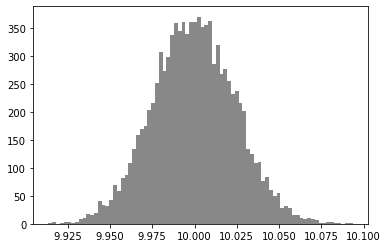

In [115]:
import matplotlib.pyplot as plt

simulation = [random.gauss(10, 0.0245) for _ in range(10000)]
# simulation = [random.uniform(9.9, 10.1) for _ in range(10000)]
min(simulation), max(simulation)
plt.hist(simulation, bins=80, color="#888888")
plt.show()